In [1]:
import numpy as np
import cv2

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
def display(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xticks([]),plt.yticks([])
    plt.show()

In [13]:
def guidisplay(img):
    cv2.imshow('image',img)
    cv2.waitKey(0)

### 缩放

In [4]:
img = cv2.imread('1.png')

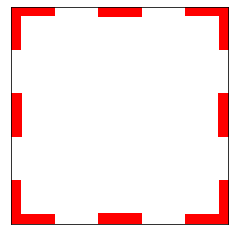

In [8]:
display(img)

In [14]:
res = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
guidisplay(res)

In [15]:
res.shape

(177, 177, 3)

In [16]:
img.shape

(354, 354, 3)

### 移动

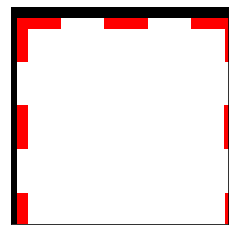

In [19]:
rows,cols,_ = img.shape
M = np.float32([[1,0,10],[0,1,20]])#移动矩阵，10是x方向，20是y方向
dst = cv2.warpAffine(img,M,(cols,rows))
display(dst)

### 旋转

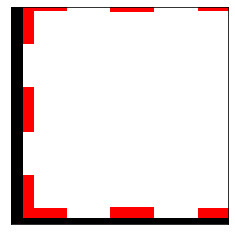

In [20]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)#旋转中心是图片中心，注意是逆时针旋转的
dst = cv2.warpAffine(dst,M,(cols,rows))
display(dst)

### 仿射变换Affine transform
参考资料https://blog.csdn.net/robert_chen1988/article/details/80498805

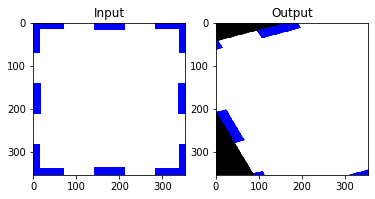

In [21]:
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 透视变换Perspectivetransformation

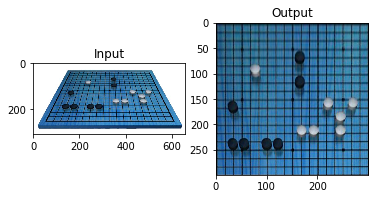

In [22]:
chess = cv2.imread('chess.jpg')
rows,cols,ch = chess.shape

pts1 = np.float32([[162,40],[56,251],[498,40],[606,252]])
pts2 = np.float32([[0,0],[0,300],[300,0],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(chess,M,(300,300))

plt.subplot(121),plt.imshow(chess),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()